In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

In [2]:
# Series
obj = pd.Series([4, 7, -5, 3])

In [3]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [4]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])

In [5]:
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [6]:
# What will happen if you don't give enough indices??
# obj3 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c'])

# You will get Value Error!

In [7]:
obj.values

array([ 4,  7, -5,  3])

In [8]:
obj.index

RangeIndex(start=0, stop=4, step=1)

In [9]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

In [10]:
obj2['a']

-5

In [11]:
obj2['d'] = 6

In [12]:
obj2[['c', 'a', 'd']]

c    3
a   -5
d    6
dtype: int64

In [13]:
obj2[obj2 > 0]

d    6
b    7
c    3
dtype: int64

In [14]:
obj2 * 2

d    12
b    14
a   -10
c     6
dtype: int64

In [15]:
np.exp(obj2)

d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

In [16]:
'b' in obj2

True

In [17]:
6 in obj2 # Only works for Index!! Not Values

False

In [18]:
obj2 # 6 is clearly in the values

d    6
b    7
a   -5
c    3
dtype: int64

In [19]:
'a' in obj2

True

In [20]:
sdata = {'Ohio'  : 35000, 
         'Texas' : 71000,
         'Oregon': 16000,
         'Utah'  : 5000}

obj3 = pd.Series(sdata)

In [21]:
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [22]:
states = ['California', 'Ohio', 'Oregon', 'Texas']

# A lot of work to stop pandas from converting your int to float...
obj4 = pd.Series(sdata, index=states, dtype=pd.Int64Dtype)

In [23]:
obj4

California      NaN
Ohio          35000
Oregon        16000
Texas         71000
dtype: object

In [24]:
# obj4['California'] = 5000.0

In [25]:
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [26]:
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

In [27]:
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [28]:
obj3 + obj4

California       NaN
Ohio           70000
Oregon         32000
Texas         142000
Utah             NaN
dtype: object

In [29]:
obj4.name = 'population'

In [30]:
obj4

California      NaN
Ohio          35000
Oregon        16000
Texas         71000
Name: population, dtype: object

In [31]:
obj4.index.name = 'state'

In [32]:
obj4

state
California      NaN
Ohio          35000
Oregon        16000
Texas         71000
Name: population, dtype: object

In [33]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [34]:
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']

In [35]:
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

In [36]:
obj.name = 'Classroom'

In [37]:
obj.index.name = 'Student_Name'

In [38]:
obj

Student_Name
Bob      4
Steve    7
Jeff    -5
Ryan     3
Name: Classroom, dtype: int64

In [39]:
# Most common way to construct a DataFrame
# Using a dictionary of equal length list/NumPy arrays

data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

frame = pd.DataFrame(data)

In [40]:
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [41]:
pd.DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [42]:
# If you pass something not in a DataFrame, it will be return as nan
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four', 'five', 'six'])

In [43]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [44]:
frame2['state'] # Series

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [45]:
frame2[['state']] # DataFrame

,state
one,Ohio
two,Ohio
three,Ohio
four,Nevada
five,Nevada
six,Nevada


In [46]:
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

In [47]:
# using the loc attribute
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [48]:
frame['debt'] = 16.5

In [49]:
frame

,state,year,pop,debt
0,Ohio,2000,1.5,16.5
1,Ohio,2001,1.7,16.5
2,Ohio,2002,3.6,16.5
3,Nevada,2001,2.4,16.5
4,Nevada,2002,2.9,16.5
5,Nevada,2003,3.2,16.5


In [50]:
frame['debt'] = np.arange(6.)

In [51]:
frame

,state,year,pop,debt
0,Ohio,2000,1.5,0.0
1,Ohio,2001,1.7,1.0
2,Ohio,2002,3.6,2.0
3,Nevada,2001,2.4,3.0
4,Nevada,2002,2.9,4.0
5,Nevada,2003,3.2,5.0


In [52]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
frame2['debt'] = val
frame2

# Intersetingly if you have a bad index, nothing will happen to that value

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


In [53]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'bad_four', 'five'])
frame2['debt'] = val
frame2

# Intersetingly if you have a bad index, nothing will happen to that value

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


In [54]:
frame2['eastern'] = (frame2.state == 'Ohio')
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,NaN,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


In [55]:
del frame2['eastern']

In [56]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


In [57]:
frame2_copy = frame2.copy()

In [58]:
frame2_copy

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


In [59]:
del frame2_copy['pop']

In [60]:
frame2_copy

,year,state,debt
one,2000,Ohio,NaN
two,2001,Ohio,-1.2
three,2002,Ohio,NaN
four,2001,Nevada,NaN
five,2002,Nevada,-1.7
six,2003,Nevada,NaN


In [61]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


In [62]:
# another way to create a dataframe...
pop = {'Nevada' : {2001: 2.4, 2002 : 2.9},
       'Ohio' : {2000: 1.5, 2001 : 1.7, 2002 : 3.6}}

In [63]:
frame3 = pd.DataFrame(pop)

In [64]:
frame3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [65]:
frame3.T

,2000,2001,2002
Nevada,NaN,2.4,2.9
Ohio,1.5,1.7,3.6


In [66]:
pd.DataFrame(pop, index=[2001, 2002, 2003])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


In [67]:
pd.DataFrame(pop)

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [68]:
pdata = {'Ohio': frame3['Ohio'][:-1],
         'Nevada' : frame3['Nevada'][:2]}

In [69]:
pd.DataFrame(pdata)

,Ohio,Nevada
2000,1.5,NaN
2001,1.7,2.4


In [70]:
frame3['Ohio'][:-1]

2000    1.5
2001    1.7
Name: Ohio, dtype: float64

In [71]:
frame3.index.name = 'year'

In [72]:
frame3.columns.name = 'state'

In [73]:
frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [74]:
frame3.values

array([[nan, 1.5],
       [2.4, 1.7],
       [2.9, 3.6]])

In [75]:
frame2.values

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, -1.2],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, nan],
       [2002, 'Nevada', 2.9, -1.7],
       [2003, 'Nevada', 3.2, nan]], dtype=object)

In [76]:
pd.DataFrame([[1, 2, 3], [4, 5, 6]], 
              index=['a', 'b'], 
              columns=['Apple', 'Dog', 'Cat'])

,Apple,Dog,Cat
a,1,2,3
b,4,5,6


In [77]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])

In [78]:
obj

a    0
b    1
c    2
dtype: int64

In [79]:
type(obj)

pandas.core.series.Series

In [80]:
index = obj.index

In [81]:
index

Index(['a', 'b', 'c'], dtype='object')

In [82]:
index[1:]

Index(['b', 'c'], dtype='object')

In [83]:
labels = pd.Index(np.arange(3))

In [84]:
labels

Int64Index([0, 1, 2], dtype='int64')

In [85]:
obj2 = pd.Series([1.5, -2.5, 0], index=labels)

In [86]:
frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [87]:
frame3.columns

Index(['Nevada', 'Ohio'], dtype='object', name='state')

In [88]:
'Ohio' in frame3

True

In [89]:
'Ohio' in frame3.columns

True

In [90]:
'Ohio' in frame3.index

False

In [91]:
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])

In [92]:
dup_labels

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')

In [93]:
# Reindexing
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])

In [94]:
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [95]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])

# introduce nan if the index is not already present

In [96]:
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [97]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])

In [98]:
obj3

0      blue
2    purple
4    yellow
dtype: object

In [99]:
obj3.reindex(range(6), method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [100]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=['a', 'b', 'd'],
                     columns=['Ohio', 'Texas', 'New York'])

In [101]:
frame

,Ohio,Texas,New York
a,0,1,2
b,3,4,5
d,6,7,8


In [102]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])

In [103]:
frame2

,Ohio,Texas,New York
a,0.0,1.0,2.0
b,3.0,4.0,5.0
c,NaN,NaN,NaN
d,6.0,7.0,8.0


In [104]:
states = ['Texas', 'New York', 'California']
frame.reindex(columns=states)

,Texas,New York,California
a,1,2,NaN
b,4,5,NaN
d,7,8,NaN


In [105]:
# frame.loc[['a', 'b', 'c', 'd'], states]

In [106]:
# How to create a list of characters
letters = [chr(ord('a') + x) for x in range(5)]
letters

['a', 'b', 'c', 'd', 'e']

In [107]:
obj = pd.Series(np.arange(5.), index=letters)

In [108]:
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [109]:
new_obj = obj.drop('c')
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [110]:
obj.drop(['d', 'c']) # drop method returns a copy! 

a    0.0
b    1.0
e    4.0
dtype: float64

In [111]:
obj 

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [112]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])

In [113]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [114]:
data.drop(['Colorado', 'Ohio']) # this is dropping rows

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [115]:
data.drop(['one'], axis=1) # this is dropping column

,two,three,four
Ohio,1,2,3
Colorado,5,6,7
Utah,9,10,11
New York,13,14,15


In [116]:
data.drop('two', axis='columns') # this is also dropping column

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [117]:
obj = pd.Series(np.arange(4.), 
                index=['a', 'b', 'c', 'd'])

In [118]:
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [119]:
obj['b']

1.0

In [120]:
obj[1]

1.0

In [121]:
obj[2:4]

c    2.0
d    3.0
dtype: float64

In [122]:
obj[['a', 'b', 'c']]

a    0.0
b    1.0
c    2.0
dtype: float64

In [123]:
obj[[1, 3]]

b    1.0
d    3.0
dtype: float64

In [124]:
obj[obj < 2]

a    0.0
b    1.0
dtype: float64

In [125]:
obj < 2

a     True
b     True
c    False
d    False
dtype: bool

In [126]:
# end points are inclusive
obj['b':'c']

b    1.0
c    2.0
dtype: float64

In [127]:
obj['b':'c'] = 99

In [128]:
obj

a     0.0
b    99.0
c    99.0
d     3.0
dtype: float64

In [129]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])

In [130]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [131]:
data['two'] # Series

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int64

In [132]:
data[['three', 'one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


In [133]:
data[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [134]:
data[data['three'] > 5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [135]:
data.loc['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int64

In [136]:
data.iloc[1, [3, 0, 1]]

four    7
one     4
two     5
Name: Colorado, dtype: int64

In [137]:
data.iloc[2]

one       8
two       9
three    10
four     11
Name: Utah, dtype: int64

In [138]:
data.iloc[[1, 2], [1, 2, 3]]

,two,three,four
Colorado,5,6,7
Utah,9,10,11


In [139]:
data.loc[:'Utah', 'two']

Ohio        1
Colorado    5
Utah        9
Name: two, dtype: int64

In [140]:
data.iloc[:, :3][data.three > 5]

,one,two,three
Colorado,4,5,6
Utah,8,9,10
New York,12,13,14


In [141]:
ser = pd.Series(np.arange(3.))

In [142]:
ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [143]:
ser2 = pd.Series(np.arange(3.), index=['a', 'b', 'c'])

In [144]:
ser2[-1]

2.0

In [145]:
ser2

a    0.0
b    1.0
c    2.0
dtype: float64

In [146]:
ser[:2]

0    0.0
1    1.0
dtype: float64

In [147]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5],
               index=['a', 'c', 'd', 'e'])

In [148]:
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],
               index=['a', 'c', 'e', 'f', 'g'])

In [149]:
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [150]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [151]:
s1 + s2 # similiar to a full outter join on SQL

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [152]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)),
                   columns=list('bcd'),
                   index=['Ohio', 'Texas', 'Colorado'])

df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                   columns=list('bde'),
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])
                   
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


In [153]:
df1 = pd.DataFrame({'A': [1, 2]})
df2 = pd.DataFrame({'B': [3, 4]})

df1 - df2

,A,B
0,NaN,NaN
1,NaN,NaN


In [154]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),
                   columns=list('abcd'))

df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),
                   columns=list('abcde'))

In [155]:
df2.loc[1, 'b'] = np.nan

In [156]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [157]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [158]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [159]:
# Add arugment to fill missing value
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [160]:
1 / df1

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


In [161]:
df1.div(1)

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [162]:
df1.rdiv(1)

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


In [163]:
df1.reindex(columns=df2.columns, fill_value=0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


In [164]:
arr = np.arange(12.).reshape((3, 4))

In [165]:
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [166]:
arr[0]

array([0., 1., 2., 3.])

In [167]:
arr - arr[0]

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

In [168]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                     columns=list('bde'),
                     index=['Utah Ohio Texax Oregon'.split()])

In [169]:
series = frame.iloc[0]

In [170]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texax,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [171]:
series

b    0.0
d    1.0
e    2.0
Name: (Utah,), dtype: float64

In [172]:
frame - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texax,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


In [173]:
series2 = pd.Series(range(3), index=['b', 'e', 'f'])

In [174]:
frame + series2

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texax,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


In [175]:
series3 = frame['d']

In [176]:
series3

Utah       1.0
Ohio       4.0
Texax      7.0
Oregon    10.0
Name: d, dtype: float64

In [177]:
frame.sub(series3, axis='index') # broadcast across

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texax,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


In [178]:
frame = pd.DataFrame(np.random.rand(4, 3), 
                     columns=list('bde'), 
                     index=['Utah Ohio Texax Oregon'.split()])

In [179]:
frame

,b,d,e
Utah,0.209398,0.665808,0.441985
Ohio,0.332070,0.938861,0.915065
Texax,0.228463,0.241371,0.130370
Oregon,0.410791,0.585598,0.116394


In [180]:
np.abs(frame)

,b,d,e
Utah,0.209398,0.665808,0.441985
Ohio,0.332070,0.938861,0.915065
Texax,0.228463,0.241371,0.130370
Oregon,0.410791,0.585598,0.116394


In [181]:
f = lambda x: x.max() - x.min()
frame.apply(f)

b    0.201393
d    0.697490
e    0.798671
dtype: float64

In [182]:
frame.apply(lambda x: x.max() - x.min())

b    0.201393
d    0.697490
e    0.798671
dtype: float64

In [183]:
frame.apply(lambda x: x.max())

b    0.410791
d    0.938861
e    0.915065
dtype: float64

In [184]:
# Applied once per row
frame.apply(lambda x: x.max(), axis='columns')

Utah      0.665808
Ohio      0.938861
Texax     0.241371
Oregon    0.585598
dtype: float64

In [185]:
maximun_value = frame.apply(lambda x : x.max(), 
                            axis='columns')

In [186]:
# This is how you get the floating point value from
# the Panda's series after you max it.
utah_max = maximun_value['Utah'].values[0]

In [187]:
type(utah_max)

numpy.float64

In [188]:
print(utah_max)

0.6658081100140407


In [189]:
def f(x):
    return pd.Series([x.min(), x.max()],
                     index=['min', 'max'])

In [190]:
frame.apply(f)

,b,d,e
min,0.209398,0.241371,0.116394
max,0.410791,0.938861,0.915065


In [191]:
# Format function that shows 2 significan digits
function_format = lambda x: '{0:.2}'.format(x)
frame.applymap(function_format)

,b,d,e
Utah,0.21,0.67,0.44
Ohio,0.33,0.94,0.92
Texax,0.23,0.24,0.13
Oregon,0.41,0.59,0.12


In [192]:
frame['e'].map(function_format)

Utah      0.44
Ohio      0.92
Texax     0.13
Oregon    0.12
Name: e, dtype: object

In [193]:
obj = pd.Series(range(4), index=['d a b c'.split()])

In [194]:
obj

d    0
a    1
b    2
c    3
dtype: int64

In [195]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [196]:
# Helper function to do the list creation 
def f(myString):
    return myString.split()


In [197]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                     index=f('three one'),
                     columns=f('d a b c'))

In [198]:
frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [199]:
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [200]:
frame.sort_index(axis='columns')

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [201]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [202]:
frame.reindex('d c a b'.split(), axis='columns')

,d,c,a,b
three,0,3,1,2
one,4,7,5,6


In [203]:
frame.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [204]:
obj = pd.Series([4, 7, -3, 2])

In [205]:
obj

0    4
1    7
2   -3
3    2
dtype: int64

In [206]:
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

In [207]:
obj.sort_values(ascending=False)

1    7
0    4
3    2
2   -3
dtype: int64

In [208]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])

In [209]:
obj

0    4.0
1    NaN
2    7.0
3    NaN
4   -3.0
5    2.0
dtype: float64

In [210]:
obj.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

In [211]:
sorted_obj = obj.sort_values()

In [212]:
sorted_obj[-3:] # last 3 time

2    7.0
1    NaN
3    NaN
dtype: float64

In [213]:
sorted_obj[:-3] # exclude last 3

4   -3.0
5    2.0
0    4.0
dtype: float64

In [214]:
frame = pd.DataFrame({'b': [4, 7, -3, 2],
                      'a': [0, 1, 0, 1]})

In [215]:
frame.sort_values(by='a')

,b,a
0,4,0
2,-3,0
1,7,1
3,2,1


In [216]:
frame.sort_values(by=['a', 'b'])

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


In [217]:
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])

In [218]:
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [219]:
obj.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [220]:
# Assign the tie values to the maximun rank in the group
obj.rank(ascending=False, method='max')

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

In [221]:
frame = pd.DataFrame({'b':[4.3, 7, -3, -2],
                      'a':[0, 1, 0, 1],
                      'c':[-2, 5, 8, -2.5]})

In [222]:
frame.rank(axis='columns', ascending=False)

,b,a,c
0,1.0,2.0,3.0
1,1.0,3.0,2.0
2,3.0,2.0,1.0
3,2.0,1.0,3.0


In [223]:
obj = pd.Series(range(5), 
                index=['a a b b c'.split()])

In [224]:
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [225]:
obj.index.is_unique

False

In [226]:
obj['a'] # Return series

a    0
a    1
dtype: int64

In [227]:
apple = obj['c'] 

In [228]:
type(apple)

pandas.core.series.Series

In [229]:
# https://stackoverflow.com/questions/20383647/pandas-selecting-by-label-sometimes-return-series-sometimes-returns-dataframe

# https://stackoverflow.com/a/20384317
# better to pass a list of indice/index to 
# ensure getting a dataframe everytime.

In [230]:
df = pd.DataFrame(np.random.randn(4, 3), 
                  index='a a b b'.split())

In [231]:
df

,0,1,2
a,0.223264,-1.756353,1.373751
a,-0.018500,0.397154,-0.201868
b,-1.531020,0.369860,-0.567215
b,-0.928709,0.370435,0.533811


In [232]:
df.loc['b'] # Return multiple rows

,0,1,2
b,-1.531020,0.369860,-0.567215
b,-0.928709,0.370435,0.533811


In [233]:
df.loc[:, 1] # By column

a   -1.756353
a    0.397154
b    0.369860
b    0.370435
Name: 1, dtype: float64

In [234]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [.75, -1.3]],
                  index='a b c d'.split(),
                  columns='one two'.split())

In [235]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [236]:
df.sum()

one    9.25
two   -5.80
dtype: float64

In [237]:
df.sum(axis='columns')

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [238]:
df.mean(axis='columns', skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

In [239]:
df.idxmax() # Return the index value 

one    b
two    d
dtype: object

In [240]:
df['one']['b']

7.1

In [241]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [242]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [243]:
obj = pd.Series('a a b c'.split() * 4)

In [244]:
obj

0     a
1     a
2     b
3     c
4     a
5     a
6     b
7     c
8     a
9     a
10    b
11    c
12    a
13    a
14    b
15    c
dtype: object

In [245]:
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

In [259]:
from tiingo import TiingoClient

In [263]:
config = {'session': True, 
          'api_key': 'XXXXXXX'}

client = TiingoClient(config)

In [265]:
ticket_metadata = client.get_ticker_metadata("GOOGL")

In [266]:
ticket_metadata

{'startDate': '2004-08-19',
 'exchangeCode': 'NASDAQ',
 'name': 'Alphabet Inc Class A',
 'endDate': '2019-07-05',
 'ticker': 'GOOGL',
 'description': "Google Inc. (Google) is a global technology company. The Company's business is primarily focused around key areas, such as search, advertising, operating systems and platforms, enterprise and hardware products. The Company generates revenue primarily by delivering online advertising. The Company also generates revenues from Motorola by selling hardware products. The Company provides its products and services in more than 100 languages and in more than 50 countries, regions, and territories. Effective May 16, 2014, Google Inc acquired Quest Visual Inc. Effective May 20, 2014, Google Inc acquired Enterproid Inc, doing business as Divide. In June 2014, Google Inc acquired mDialog Corp. Effective June 25, 2014, Google Inc acquired Appurify Inc, a San Francisco-based developer of mobile bugging application software."}

In [267]:
historical_prices = client.get_ticker_price("GOOGL",
                                            fmt='json',
                                            startDate='2018-01-01',
                                            endDate='2018-01-31',
                                            frequency='daily')

In [279]:
google_dic = historical_prices.copy()

In [280]:
google_df = pd.DataFrame(google_dic)

In [281]:
google_df.head(5)

,adjClose,adjHigh,adjLow,adjOpen,adjVolume,close,date,divCash,high,low,open,splitFactor,volume
0,1073.21,1075.98,1053.02,1053.02,1555809,1073.21,2018-01-02T00:00:00.000Z,0.0,1075.98,1053.02,1053.02,1.0,1555809
1,1091.52,1096.10,1073.43,1073.93,1550593,1091.52,2018-01-03T00:00:00.000Z,0.0,1096.10,1073.43,1073.93,1.0,1550593
2,1095.76,1104.08,1094.26,1097.09,1289293,1095.76,2018-01-04T00:00:00.000Z,0.0,1104.08,1094.26,1097.09,1.0,1289293
3,1110.29,1113.58,1101.80,1103.45,1493389,1110.29,2018-01-05T00:00:00.000Z,0.0,1113.58,1101.80,1103.45,1.0,1493389
4,1114.21,1119.16,1110.00,1111.00,1148958,1114.21,2018-01-08T00:00:00.000Z,0.0,1119.16,1110.00,1111.00,1.0,1148958


In [291]:
price = pd.DataFrame(google_df[['adjClose']])

In [293]:
volume = pd.DataFrame(google_df[['volume']])

In [294]:
returns = price.pct_change()

In [296]:
returns.tail()

,adjClose
16,0.009263
17,0.004585
18,-0.000909
19,-0.007678
20,0.004119


In [340]:
obj = pd.Series('c a d a a b b c c'.split())

In [341]:
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [307]:
uniques = obj.unique() # ndarray

In [308]:
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

In [309]:
uniques.sort()

In [310]:
uniques

array(['a', 'b', 'c', 'd'], dtype=object)

In [311]:
obj.value_counts()

c    3
a    3
b    2
d    1
dtype: int64

In [312]:
pd.value_counts(obj.values, sort=False)

d    1
a    3
b    2
c    3
dtype: int64

In [313]:
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [314]:
mask = obj.isin(['b', 'c'])

In [315]:
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [353]:
obj[obj.isin(['b', 'c'])]

0    c
5    b
6    b
7    c
8    c
dtype: object

In [354]:
to_match = pd.Series('c a b b c a'.split())

In [355]:
unique_vals = pd.Series(['c', 'b', 'a'])

In [356]:
pd.Index(unique_vals).get_indexer(to_match)

array([0, 2, 1, 1, 0, 2])

In [357]:
to_match

0    c
1    a
2    b
3    b
4    c
5    a
dtype: object

In [362]:
unique_vals2 = pd.Series(['b', 'a'])
lookup_indice = pd.Index(unique_vals2).get_indexer(to_match)

In [363]:
to_match[lookup_indice]

-1    NaN
 1      a
 0      c
 0      c
-1    NaN
 1      a
dtype: object

In [364]:
to_match[lookup_indice].value_counts()

a    2
c    2
dtype: int64

In [365]:
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
                     'Qu2': [2, 3, 1, 2, 3],
                     'Qu3': [1, 5, 2, 4, 4]})

data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [366]:
# How to compute a histogram on multiple related columns
result = data.apply(pd.value_counts).fillna(0)

In [367]:
result

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


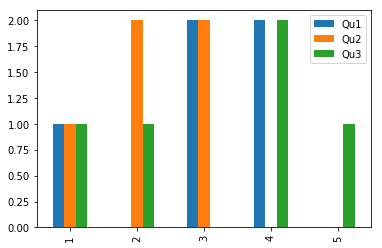

In [376]:
result.plot(kind='bar', rot=90)